In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os

ModuleNotFoundError: No module named 'networkx'

In [ ]:
import csv

In [ ]:
nodes = []
links = {}

In [ ]:
with open('nodes.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        nodes.append(row[0])

In [ ]:
with open('links.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        if row[0] in links:
            links[row[0]].append(row[1])
        else:
            links[row[0]] = [row[1]]

In [ ]:
nodes

In [ ]:
links

### Ordering edges (makes life easier)

In [ ]:
edges = {}
for link in links:
    link_list = links[link]
    for i in range(0, len(link_list)):
        link_list[i] = int(link_list[i])
    
    # Ordering the list
    link_list.sort()
    for i in range(0, len(link_list)):
        link_list[i] = str(link_list[i])
        
    edges[link] = link_list

In [ ]:
edges

### Building the full graph

In [ ]:
graph = {}
for node in nodes:
    if node in links:
        graph[node] = edges[node]
    else:
        graph[node] = []

### Starting DFS

In [54]:
class DFS:
    time = None
    graph = None
    start_node = None
    parent = []
    start_finish_time = {}
    edges_types = []
    
    # Starts the class with initial position and graph
    def __init__(self, start_node, graph):
        self.graph = graph
        self.start_node = start_node
        self.__sort_graph()
        self.time = 0
        return
    
    # This function is only an abstration to simplify things.
    # Each time that we call it, time increases by one.
    def __get_time(self):
        self.time = self.time + 1
        return self.time
    
    # This function is only to make debugging easier.
    def __sort_start_finish(self):
        index = 0
        nodes = list(self.start_finish_time)
        last = len(nodes)
        ordered_start_finish = {}
        for n in range(1, 21):
            ordered_start_finish[str(n)] = self.start_finish_time[str(n)]
        self.start_finish_time = ordered_start_finish
        return
    
    # This function is only to make debugging easier.
    # In our class we stablished that there's no need to order the graph.
    def __sort_graph(self):
        index = 0
        nodes = list(self.graph)
        last = len(nodes)
        ordered_graph = {}
        for n in nodes:
            if n == self.start_node:
                break
            index = index + 1
        for n in (nodes[index:last] + nodes[0:index]):
            ordered_graph[n] = self.graph[n]
        self.graph = ordered_graph
        return
    
    # Register start and finish times for each node
    def __add_start_finish(self, node, start, finish):
        print("Node {} started {} and finished {}".format(node, start, finish))
        self.start_finish_time[node] = [start, finish]
        return
    
    # Finds node index
    def __find_index(self, node1):
        index = 0
        for node in self.parent:
            if node == node1: 
                break
            index = index + 1
        return index
    
    # Returns true if it's a tree node
    # False if it's a forward node
    def __is_it_tree(self, node1, node2):
        index = self.__find_index(node1)
        # By looking into the parent list, and, by having the total number of edges that this node has,
        # we can determine if it's a tree or a foward node. A tree node wouldn't exist before it appeared in the parent node
        # Of course, this only can be used, if we meet the premises of a forward node, which are: 
        # start1 < start2 and finish1 > finish2
        search_span = len(self.graph[node1]) + index + 1
        print("Probable forward node : {} -> {}".format(node1, node2))
        print(search_span)
        print(index)
        for i in range(index, search_span):
            if self.parent[i] == node2:
                return True
        return False
    
    
    # Function to classify an edge
    def __edge_classification(self, node1, node2):
        start_node1 = self.start_finish_time[node1][0]
        finish_node1 = self.start_finish_time[node1][1]
        start_node2 = self.start_finish_time[node2][0]
        finish_node2 = self.start_finish_time[node2][1]
        
        # Backward Edge
        if start_node2 < start_node1  and finish_node1 < finish_node2:
            return "backward"
        
        # Cross Edge
        if start_node1 > finish_node2:
            return "cross"
        
        # Forward or tree nodes are harder
        # They're to much alike, so, we need something bold
        if self.__is_it_tree(node1, node2):
            return "tree"
        
        return "forward"
        
    # Function to build the edge type file
    def __classify_edges(self):
        for node in self.graph:
            for edge in self.graph[node]:
                # Getting the type of an edge
                edge_type = self.__edge_classification(node, edge)
                self.edges_types.append([node, edge, edge_type])
        return
    
    # Auxiliary function to visit nodes
    def __dfs_visit(self, linked_nodes):
        for n in linked_nodes:
            if n not in self.parent:
                # Getting the start time of the node
                self.parent.append(n)
                start_time = self.__get_time()
                print(n)
                self.__dfs_visit(self.graph[n])
                # Getting the finish time of the node
                finish_time = self.__get_time()
                self.__add_start_finish(n, start_time, finish_time)
        return
    
    # Function that generates everything
    def run_dfs(self):
        for node in self.graph:
            if node not in self.parent:
                self.parent.append(node)
                start_time = self.__get_time()
                print(node)
                linked_nodes = self.graph[node]
                self.__dfs_visit(linked_nodes)
                finish_time = self.__get_time()
                self.__add_start_finish(node, start_time, finish_time)  
        self.__classify_edges()
        self.__sort_start_finish()
        return

In [55]:
list(range(0, 1))

[0]

#### Runing DFS

In [56]:
d = DFS('10', graph)

In [57]:
d.run_dfs()

10
8
4
9
14
2
11
Node 11 started 7 and finished 8
Node 2 started 6 and finished 9
Node 14 started 5 and finished 10
Node 9 started 4 and finished 11
13
12
Node 12 started 13 and finished 14
Node 13 started 12 and finished 15
Node 4 started 3 and finished 16
Node 8 started 2 and finished 17
Node 10 started 1 and finished 18
15
5
Node 5 started 20 and finished 21
Node 15 started 19 and finished 22
16
1
Node 1 started 24 and finished 25
3
Node 3 started 26 and finished 27
7
Node 7 started 28 and finished 29
Node 16 started 23 and finished 30
17
Node 17 started 31 and finished 32
18
Node 18 started 33 and finished 34
19
Node 19 started 35 and finished 36
20
Node 20 started 37 and finished 38
6
Node 6 started 39 and finished 40
Probable forward node : 10 -> 8
3
0
Probable forward node : 10 -> 12
3
0
Probable forward node : 13 -> 12
9
7
Probable forward node : 14 -> 2
6
4
Probable forward node : 15 -> 5
11
9
Probable forward node : 16 -> 1
16
11
Probable forward node : 16 -> 3
16
11
Probable

In [58]:
index = 0
for node in d.parent:
    if node == '10': 
        break
    index = index + 1
index

0

In [59]:
d.graph

{'10': ['8', '12'],
 '11': ['10'],
 '12': [],
 '13': ['12'],
 '14': ['2'],
 '15': ['5'],
 '16': ['1', '3', '4', '7'],
 '17': ['4'],
 '18': ['3', '9', '14', '16'],
 '19': ['5', '8', '15'],
 '20': ['1', '4'],
 '1': [],
 '2': ['11'],
 '3': [],
 '4': ['9', '13'],
 '5': ['9', '11'],
 '6': ['10', '11'],
 '7': ['9', '15'],
 '8': ['4'],
 '9': ['14']}

In [60]:
d.start_finish_time

{'1': [24, 25],
 '2': [6, 9],
 '3': [26, 27],
 '4': [3, 16],
 '5': [20, 21],
 '6': [39, 40],
 '7': [28, 29],
 '8': [2, 17],
 '9': [4, 11],
 '10': [1, 18],
 '11': [7, 8],
 '12': [13, 14],
 '13': [12, 15],
 '14': [5, 10],
 '15': [19, 22],
 '16': [23, 30],
 '17': [31, 32],
 '18': [33, 34],
 '19': [35, 36],
 '20': [37, 38]}

In [61]:
d.parent

['10',
 '8',
 '4',
 '9',
 '14',
 '2',
 '11',
 '13',
 '12',
 '15',
 '5',
 '16',
 '1',
 '3',
 '7',
 '17',
 '18',
 '19',
 '20',
 '6']

In [62]:
d.edges_types

[['10', '8', 'tree'],
 ['10', '12', 'forward'],
 ['11', '10', 'backward'],
 ['13', '12', 'tree'],
 ['14', '2', 'tree'],
 ['15', '5', 'tree'],
 ['16', '1', 'tree'],
 ['16', '3', 'tree'],
 ['16', '4', 'cross'],
 ['16', '7', 'tree'],
 ['17', '4', 'cross'],
 ['18', '3', 'cross'],
 ['18', '9', 'cross'],
 ['18', '14', 'cross'],
 ['18', '16', 'cross'],
 ['19', '5', 'cross'],
 ['19', '8', 'cross'],
 ['19', '15', 'cross'],
 ['20', '1', 'cross'],
 ['20', '4', 'cross'],
 ['2', '11', 'tree'],
 ['4', '9', 'tree'],
 ['4', '13', 'forward'],
 ['5', '9', 'cross'],
 ['5', '11', 'cross'],
 ['6', '10', 'cross'],
 ['6', '11', 'cross'],
 ['7', '9', 'cross'],
 ['7', '15', 'cross'],
 ['8', '4', 'tree'],
 ['9', '14', 'tree']]

The algorithm to determine foward nodes discussed in class does not work for tree nodes, and, forward nodes. 
So, it took some real analysis to make the file

In [76]:
G = nx.DiGraph()

In [77]:
i = 0
pos = {}
for g in graph:
    G.add_node(g)
    for edge in graph[g]:
        G.add_edge(g, edge)

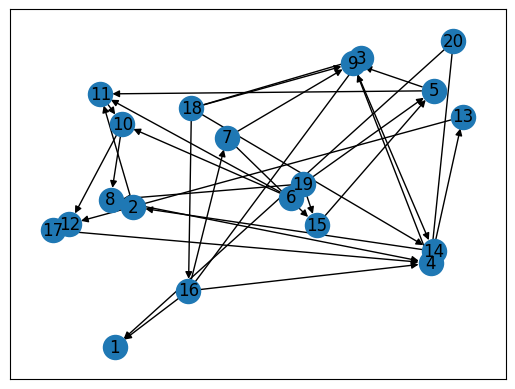

In [78]:
nx.draw_networkx(G, pos = nx.random_layout(G, center=(50,50)))